In [113]:
import requests
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from urllib import parse
from datetime import datetime, timedelta
import time

DATE_FORMAT = '%Y-%m-%d'
DEFAULT_SEARCH_INTERVAL_DAYS =7

In [114]:
with open('google_api_secret', 'rt') as f:
  secret = f.read()
  cx, secret = secret.split(' ')


# https://developers.google.com/custom-search/v1/reference/rest/v1/cse/list#response
def count(query_str, dt1, dt2):
    query = {}
    query['key'] = secret
    query['cx'] = cx
    #query['cr'] = 'ru'
    #query['filter'] = 1
    #query['lr'] = 'lang_ru'
    # exactTerms
    # num = 1
    query['q'] = f'{query_str} after:{dt1} before:{dt2}'  # f"!котел after:{dt1} before:{dt2}"
    #print(query['q'])
    url = f'https://www.googleapis.com/customsearch/v1?{parse.urlencode(query)}'
    r = requests.get(url, headers={'Accept': 'application/json'})
    if r.status_code != 200:
        print(r.text, '\n', r.status_code)
        # exit(1)
        return None
    return r.json()['searchInformation']['totalResults']


def date_str(dt):
    return str(dt).split(' ')[0]


def search(query, from_dt, to_dt, step_days=DEFAULT_SEARCH_INTERVAL_DAYS):
    if not isinstance(from_dt, datetime):
        from_dt = datetime.strptime(from_dt, DATE_FORMAT)
    if not isinstance(to_dt, datetime):
        to_dt = datetime.strptime(to_dt, DATE_FORMAT)
    result = []
    while from_dt < to_dt:
        dt1 = date_str(from_dt)
        dt2 = date_str(from_dt + timedelta(days=step_days))
        result.append((dt1, count(query, dt1, dt2)))
        from_dt += timedelta(days=step_days)
    return result


def plot(data):
    fig, ax = plt.subplots()
    dts, xs = zip(*data)
    xs = [int(x) if isinstance(x, str) else x for x in xs]
    plt.plot(dts, xs)  # , '-o'
    ax.xaxis.set_tick_params(labelsize=10)
    interval = len(data)//8
    for i, label in enumerate(ax.get_xticklabels()):
        if i % interval != 0:
            label.set_visible(False)
    fig.set_size_inches(13, 5)
    # format xs with thousand separators
    if max(xs) > 1000:
        plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    else:
        plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x}'))
    # show
    plt.show()


def plot_div(data1, data2):
    plot([(dt, int(a)/int(b)) for (dt, a), (dt2, b) in zip(data1, data2)])

In [3]:
ukr = search('украина', '2022-02-01', '2022-07-05')

украина after:2022-02-01 before:2022-02-08
украина after:2022-02-08 before:2022-02-15
украина after:2022-02-15 before:2022-02-22
украина after:2022-02-22 before:2022-03-01
украина after:2022-03-01 before:2022-03-08
украина after:2022-03-08 before:2022-03-15
украина after:2022-03-15 before:2022-03-22
украина after:2022-03-22 before:2022-03-29
украина after:2022-03-29 before:2022-04-05
украина after:2022-04-05 before:2022-04-12
украина after:2022-04-12 before:2022-04-19
украина after:2022-04-19 before:2022-04-26
украина after:2022-04-26 before:2022-05-03
украина after:2022-05-03 before:2022-05-10
украина after:2022-05-10 before:2022-05-17
украина after:2022-05-17 before:2022-05-24
украина after:2022-05-24 before:2022-05-31
украина after:2022-05-31 before:2022-06-07
украина after:2022-06-07 before:2022-06-14
украина after:2022-06-14 before:2022-06-21
украина after:2022-06-21 before:2022-06-28
украина after:2022-06-28 before:2022-07-05


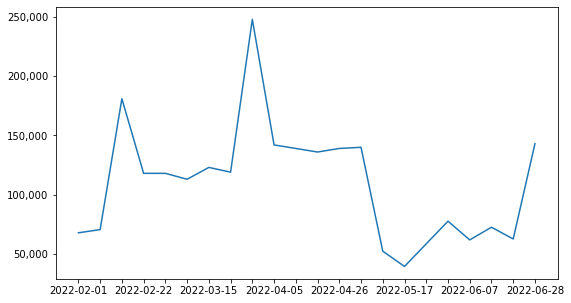

In [68]:
plot(ukr)

In [11]:
nazi = search('нацизм', '2022-02-01', '2022-07-05')

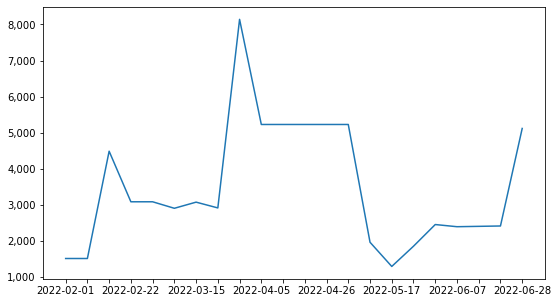

In [69]:
plot(nazi)

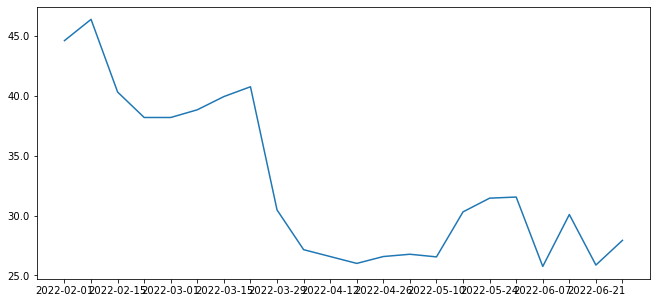

In [88]:
plot_div(ukr, nazi)

In [76]:
with open('google_api_secret2', 'rt') as f:
  secret = f.read()
  cx, secret = secret.split(' ')

ukr2 = search('украина', '2021-07-01', '2022-07-05')
nazi2 = search('нацизм', '2021-07-01', '2022-07-05')

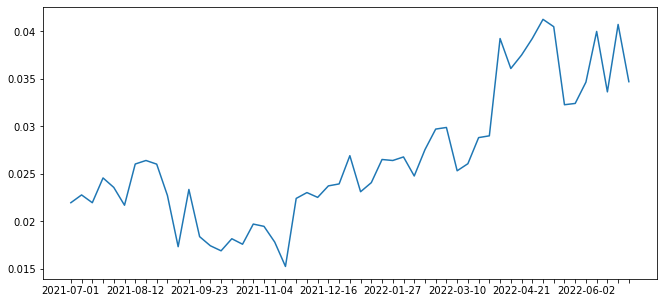

In [86]:
plot_div(nazi2, ukr2)

In [90]:
with open('google_api_secret4', 'rt') as f:  # ENG
  secret = f.read()
  cx, secret = secret.split(' ')

bucha = search('bucha', '2022-02-01', '2022-07-05')

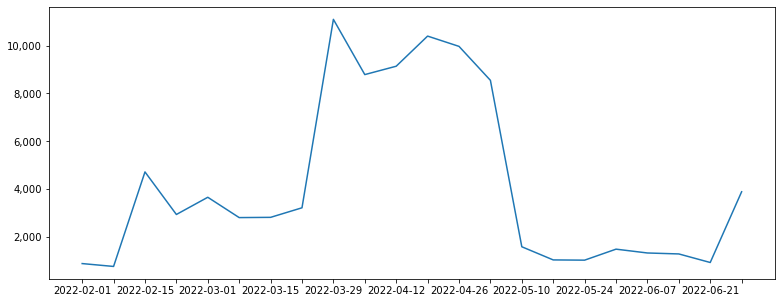

In [105]:
plot(bucha)

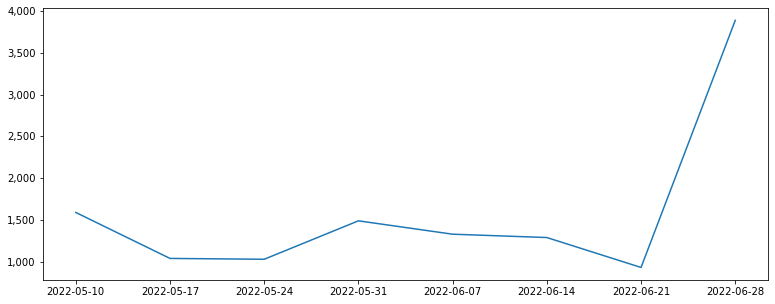

In [106]:
plot(bucha[14:])

In [109]:
with open('google_api_secret4', 'rt') as f:  # ENG
  secret = f.read()
  cx, secret = secret.split(' ')
kramatorsk = search('Kramatorsk', '2022-02-01', '2022-07-05')

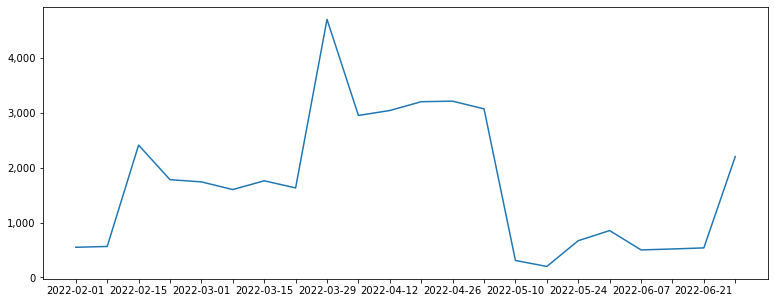

In [110]:
plot(kramatorsk)

In [111]:
with open('google_api_secret3', 'rt') as f:
  secret = f.read()
  cx, secret = secret.split(' ')

kramatorsk = search('!котел !донбас', '2022-02-01', '2022-07-05')

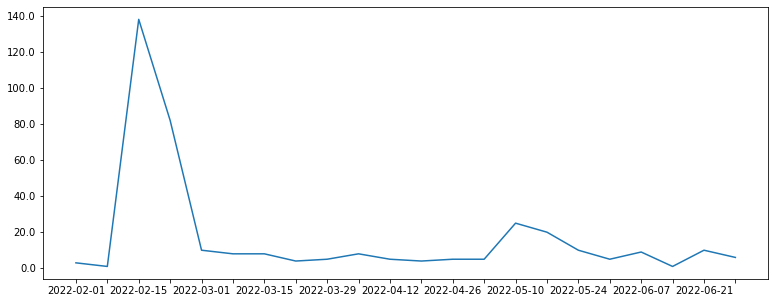

In [112]:
plot(kramatorsk)

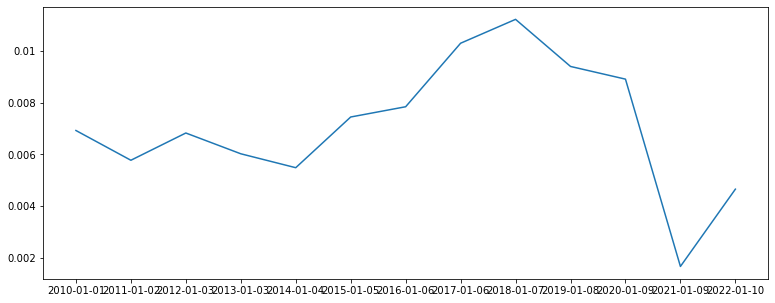

In [116]:
with open('google_api_secret3', 'rt') as f:
  secret = f.read()
  cx, secret = secret.split(' ')

ukr3 = search('украина', '2010-01-01', '2022-07-05', 366)
nazi3 = search('нацизм', '2010-01-01', '2022-07-05', 366)


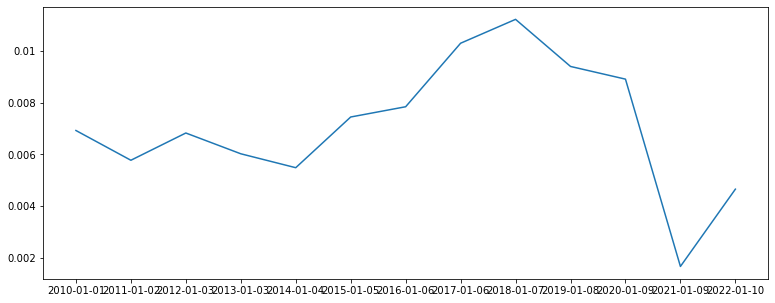

In [117]:
plot_div(nazi3, ukr3)

In [120]:
with open('google_api_secret3', 'rt') as f:
  secret = f.read()
  cx, secret = secret.split(' ')


#nazis3 = search('нацисты', '2010-01-01', '2022-07-05', 366)

In [119]:
plot_div(nazis3, ukr3)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'NoneType'

In [157]:
import pickle
def save(obj):
    for i in globals().keys():
        if i != 'obj' and globals().get(i, None) == obj:
            with open(i + '.pkl', 'ab') as f:
                _ = pickle.dump(obj, f)
                return
    raise Exception('object not found')

save(ukr)
save(nazi)
save(ukr2)
save(nazi2)
save(ukr3)
save(nazi3)
# save(nazis3)
save(bucha)
save(kramatorsk)

In [136]:
locals()['ukr'] == ukr

True

In [144]:
dir(ukr)
dict(globals()['ukr'])
def a():
    print(globals()['ukr'])

a()

[('2022-02-01', '67800'), ('2022-02-08', '70500'), ('2022-02-15', '181000'), ('2022-02-22', '118000'), ('2022-03-01', '118000'), ('2022-03-08', '113000'), ('2022-03-15', '123000'), ('2022-03-22', '119000'), ('2022-03-29', '248000'), ('2022-04-05', '142000'), ('2022-04-12', '139000'), ('2022-04-19', '136000'), ('2022-04-26', '139000'), ('2022-05-03', '140000'), ('2022-05-10', '52300'), ('2022-05-17', '39400'), ('2022-05-24', '58500'), ('2022-05-31', '77600'), ('2022-06-07', '61800'), ('2022-06-14', '72500'), ('2022-06-21', '62600'), ('2022-06-28', '143000')]
